In [1]:
from textblob import TextBlob
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../data/dataHasilPreprocessing/hasilPreprocessing1.csv')
df

,Ulasan,Sentimen
0,bahan celana bagus beliin si kaka ukur,Positif
1,kualitas bagus,Positif
2,ukur pas,Positif
3,bumil approved,Positif
4,ukur,Positif
...,...,...
893,bagus emas aja bagus banget koke sukakkk,Positif
894,foto jual ramah cmn kirim other than that love,Positif
895,nyampe sesuai mesan ukur nyah,Negatif
896,lumayan dalem oke makasih a ya,Positif


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ulasan    888 non-null    object
 1   Sentimen  898 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


In [4]:
df = df.drop_duplicates(subset=['Ulasan'])

In [5]:
df = df.dropna()

In [6]:
tb_counts = df.Sentimen.value_counts()
tb_counts

Sentimen
Positif    814
Negatif     23
Netral      18
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1fd777893a0>,
 [Text(-1.0875412093263077, 0.16508821283505418, 'Positif'),
  Text(1.0742526824737078, -0.23660341121387723, 'Negatif'),
  Text(1.3470484121555073, -0.08922205618190193, 'Netral')],
 [Text(-0.5932042959961678, 0.09004811609184772, '95.2%'),
  Text(0.5859560086220224, -0.1290564061166603, '2.7%'),
  Text(0.8481415928386526, -0.05617685018860491, '2.1%')])

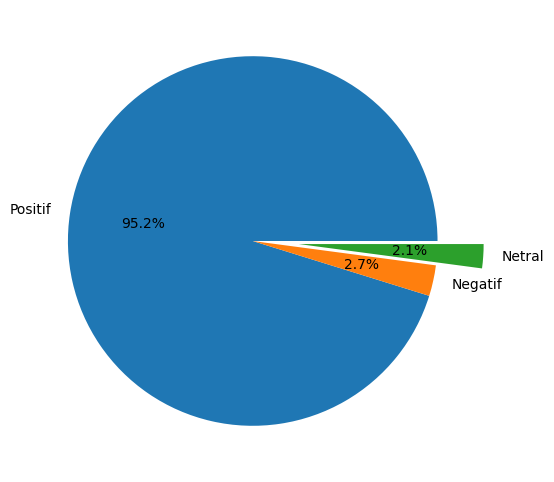

In [7]:
plt.figure(figsize=(6, 6))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

<Axes: title={'center': 'Sentiment Analysis'}, xlabel='Sentimen', ylabel='Jumlah Tweet'>

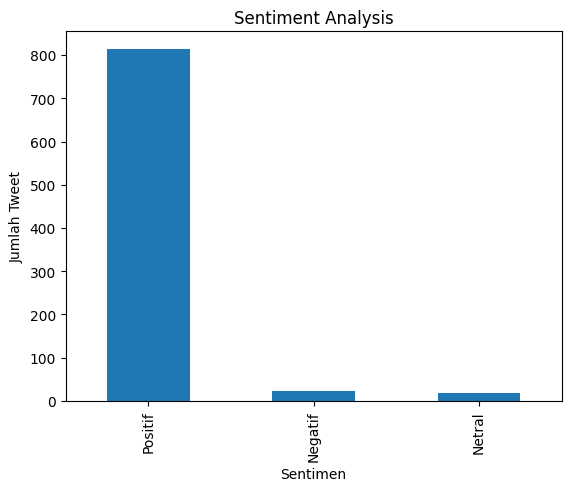

In [8]:
df['Sentimen'].value_counts().plot(kind='bar', title='Sentiment Analysis', xlabel='Sentimen', ylabel='Jumlah Tweet')

In [9]:
df.count()

Ulasan      855
Sentimen    855
dtype: int64

In [11]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [12]:
clf1 = SVC(kernel='linear')

In [13]:
X=df.Ulasan
y=df.Sentimen

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 684
Banyak data x_test  : 171
Banyak data y_train : 684
Banyak data y_test  : 171


In [16]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])

In [17]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [18]:
hasil=model.predict(x_test)

In [20]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

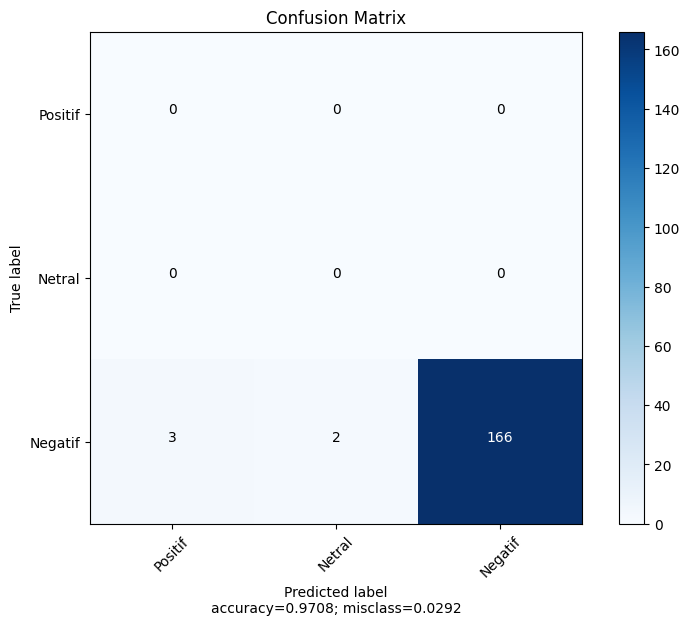

<Figure size 640x480 with 0 Axes>

In [21]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test),
                      normalize    = False,
                      target_names = ['Positif', 'Netral', 'Negatif'],
                      title        = "Confusion Matrix")

plt.savefig('hasil.png',bbox_inches='tight')

In [22]:
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         3
      Netral       0.00      0.00      0.00         2
     Positif       0.97      1.00      0.99       166

    accuracy                           0.97       171
   macro avg       0.32      0.33      0.33       171
weighted avg       0.94      0.97      0.96       171



c:\Users\Muhammad Ade Aulia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammad Ade Aulia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammad Ade Aulia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control